***Autor: Carlos Emiliano Mendoza Hernández***

Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
scale = 10 # to scale matrixes

Clase generadora de excepciones para los códigos

In [2]:
class InvalidInputMatrix(Exception):
    """
    Exception raised for errors in the input matrix.
    """
    def __init__(self, message):
        super().__init__(message)

### **1. Solución a la ecuación $\mathbf{Ax=b}$**

- Dada la ecuación $\mathbf{Lx=b}$, donde $\mathbf{L}$ es una matriz triangular inferior. Programa una función en Python que encuentre $\mathbf{x}$ dadas $\mathbf{L}$ y $\mathbf{b}$. 

In [3]:
def solve_lx_b(L: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Solves the system of linear equations Lx = b, where L is a lower triangular matrix.
    
    Example
    -------
    >>> L = np.array([[2., 0., 0., 0.], 
                      [1., 5., 0., 0.],
                      [4., 5., 2., 0.],
                      [2., 4., 4., 1.]])
    >>> b = np.array([[9., 10., 5., 6.]]).T
    >>> solve_lx_b(L, b)
    array([[ 4.5 ],
           [ 1.1 ],
           [-9.25],
           [29.6 ]])

    Parameters
    ----------
    L (ndarray) : A lower triangular square matrix
    b (ndarray) : A column vector of the same length as the number of rows in L

    Returns
    ----------
    x (ndarray) : A column vector that solves the system of linear equations Lx = b
    """
    m, n = np.shape(L)
    if m != n:
        raise InvalidInputMatrix("Matrix L is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix L and vector b have incompatible dimensions")
    x = np.zeros((n,1))
    x[0,0] = b[0,0]/L[0,0]
    for i in range (1,n):
        x[i,0] = (b[i,0]-L[i,0:i]@x[0:i,0])/L[i,i]
    return x

- Considera ahora la ecuación $\mathbf{Ux=b}$ donde $\mathbf{U}$ es una matriz triangular superior. Programa en Python una función que encuentre $\mathbf{x}$ dadas $\mathbf{U}$ y $\mathbf{b}$.

In [4]:
def solve_ux_b(U: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Solves the system of linear equations Ux = b, where U is an upper triangular matrix.
    
    Example
    -------
    >>> U = np.array([[2., 1., 4., 2.], 
                      [0., 5., 5., 4.],
                      [0., 0., 2., 4.],
                      [0., 0., 0., 1.]])
    >>> b = np.array([[9., 10., 5., 6.]]).T
    >>> solve_ux_b(U, b)
    array([[14.15],
           [ 6.7 ],
           [-9.5 ],
           [ 6.  ]])

    Parameters
    ----------
    U (ndarray) : An upper triangular square matrix
    b (ndarray) : A column vector of the same length as the number of rows in U

    Returns
    ----------
    x (ndarray) : A column vector that solves the system of linear equations Ux = b
    """
    m, n = np.shape(U)
    if m != n:
        raise InvalidInputMatrix("Matrix U is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix U and vector b have incompatible dimensions")
    x = np.zeros((n,1))
    x[n-1,0] = b[n-1,0]/U[n-1,n-1]
    for i in range (n-2,-1,-1):
        x[i,0] = (b[i,0]-U[i,i+1:n]@x[i+1:n,0])/U[i,i]
    return x

- Dada una matriz $\mathbf{A} \in \mathbb{R}^{n \times n}$ invertible, existe la solución a la ecuación $\mathbf{Ax=b}$. Si $\mathbf{A=LU}$, la solución a la ecuación $\mathbf{Ax=b}$ puede encontrarse solucionando primero la ecuación $\mathbf{Ly=b}$ y luego la ecuación $\mathbf{Ux=y}$. Utilizando esto, programa en Python una función que encuentre $\mathbf{x}$ dados $\mathbf{A}$ y $\mathbf{B}$, después de encontrar la factorización PLU de $\mathbf{A}$.

Funciones auxiliares de PLU

In [5]:
def swap_rows(A: np.ndarray, i: int, j: int) -> np.ndarray:
    """
    Swaps rows i and j of a matrix A.
    """
    B = np.copy(A)
    A[i] = B[j]
    A[j] = B[i]
    return A

In [6]:
def max_index(v: np.ndarray, j: int) -> int:
    """
    Returns the index of the maximum value in a vector v starting from index j.
    """
    v = np.abs(v)
    index = np.argmax(v[j:])
    index += j
    return index

PLU

In [7]:
def plu_fact(A: np.ndarray, epsilon: float=1e-15) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ 
    PLU decomposition of a square matrix A

    Example
    --------
    >>> A = np.array([[0., -1., 4.], [2., 1., 1.], [1., 1., -2.]])
    >>> plu_fact(A)
    (array([[ 0. , 1. , 0.],
            [ 1. , 0. , 0.],
            [ 0. , 0. , 1.]]),
    array([[ 1. ,  0. ,  0. ],
           [ 0. ,  1. ,  0. ],
           [ 0.5, -0.5,  1. ]]),
    array([[ 2. ,  1. ,  1. ],
           [ 0. , -1. ,  4. ],
           [ 0. ,  0. , -0.5]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    P (ndarray) : Permutation matrix
    L (ndarray) : Lower triangular matrix
    U (ndarray) : Upper triangular matrix
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        index = max_index(U[:,j], j)
        if abs(U[index, j]) < epsilon:
            raise InvalidInputMatrix('The matrix is non invertible.')
        P = swap_rows(P, j, index)
        L = swap_rows(L, j, index)
        U = swap_rows(U, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

Los sistemas a resolver son
$$\mathbf{Ly=Pb}$$
$$\mathbf{\mathbf{Ux=y}}$$

In [8]:
def solve_sle_plu(A: np.ndarray, b: np.ndarray, epsilon: float=1e-15) -> np.ndarray:
    """
    Solves the system of linear equations Ax = b using PLU factorization

    Example
    --------
    >>> A = np.array([[0., -1., 4.], [2., 1., 1.], [1., 1., -2.]])
    >>> b = np.array([1., 2., 3.])
    >>> solve_sle_plu(A, b)
    array([ 14., -21.,  -5.])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix
    b (ndarray) : nx1 constant matrix

    Returns
    -------
    x (ndarray) : nx1 solution vector
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix("Matrix A is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix A and vector b have incompatible dimensions")
    P, L, U = plu_fact(A, epsilon)
    y = solve_lx_b(L, P@b)
    x = solve_ux_b(U, y)
    return x

- Realiza lo mismo que en el inciso anterior suponiendo que A es simétrica y definida positiva, es decir, utiliza Cholesky para encontrar $A=LL^T$.

In [9]:
def cholesky_fact(A: np.ndarray, epsilon: float=1e-15) -> np.ndarray:
    """ 
    Cholesky decomposition of a symmetric positive definite matrix A

    Example
    --------
    >>> A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
    >>> cholesky_fact(A)
    array([[ 2. ,  0. ,  0. ],
           [-0.5,  2. ,  0. ],
           [ 0.5,  1.5,  1. ]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    L (ndarray) : Lower triangular matrix
    """
    if not np.allclose(A, A.T):
        raise InvalidInputMatrix('The matrix is not symmetric.')
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')
    L = np.zeros((n, n))
    for j in range(n):
        for i in range(j, n):
            if i == j:
                root = A[i, i] - np.sum(L[i,:j]**2)
                if root < 0:
                    raise InvalidInputMatrix('The matrix is non positive definite.')
                root = np.sqrt(root)
                if root < epsilon:
                    raise InvalidInputMatrix('The matrix is non invertible.')
                L[i, i] = root
            elif i > j:
                L[i, j] = (1/L[j, j])*(A[i, j] - np.sum(L[i,:j]*L[j,:j]))
    return L

Los sistemas a resolver son
$$\mathbf{Ly=b}$$
$$\mathbf{L^T=y}$$

In [10]:
def solve_sle_cholesky(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Solves the system of linear equations Ax = b using Cholesky factorization

    Example
    --------
    >>> A = np.array([[4., 12., -16.], [12., 37., -43.], [-16., -43., 98.]])
    >>> b = np.array([1., 2., 3.])
    >>> solve_sle_cholesky(A, b)
    array([28.58333333, -7.66666667,  1.33333333])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix
    b (ndarray) : nx1 constant matrix

    Returns
    -------
    x (ndarray) : nx1 solution vector
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix("Matrix A is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix A and vector b have incompatible dimensions")
    L = cholesky_fact(A)
    y = solve_lx_b(L, b)
    x = solve_ux_b(L.T, y)
    return x

- Considera una matriz $\mathbf{A}$ generada de forma aleatoria de dimensión $100\times100$ y un vector $\mathbf{x}\in\mathbb{R}^{100}$ tal que $x_i=i$ para $1\leq i\leq100$. Obtén un vector $\mathbf{b=Ax}$

In [11]:
M = scale*np.random.rand(100,100)
A = M@M.T
x_s = np.array([[i+1 for i in range(100)]], dtype=float).T
b = A@x_s

- Resuelve la ecuación $\mathbf{Ax=b}$ utilizando la matriz $\mathbf{A}$ y $\mathbf{b}$ del inciso anterior, utilizando tus dos solucionadores.

In [12]:
# Exact solution
x_s.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [13]:
# Solution using PLU factorization
x_plu = solve_sle_plu(A, b)
x_plu.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [14]:
# Solution using Cholesky factorization
x_cholesky = solve_sle_cholesky(A, b)
x_cholesky.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

- Calcula el error absoluto y relativo dados respectivamente por

$$\text{err}_\text{abs} = ||\mathbf{x}_s-\mathbf{x}||$$

y

$$\text{err}_\text{rel} = \frac{||\mathbf{x_s}-\mathbf{x}||}{||\mathbf{x}_s||}$$

donde $\mathbf{x}_s$ es la solución teórica y la solución obtenida por tus algoritmos.

In [15]:
def abs_err(x: np.ndarray, x_s: np.ndarray) -> float:
    """
    Calculates the absolute error between two vectors x and x_s.
    """
    return np.linalg.norm(x_s-x)

In [16]:
def rel_err(x: np.ndarray, x_s: np.ndarray) -> float:
    """
    Calculates the relative error between two vectors x and x_s.
    """
    return np.linalg.norm(x_s-x)/np.linalg.norm(x_s)

In [17]:
# PLU errors
print('Absolute error (PLU):', abs_err(x_plu, x_s))
print('Relative error (PLU):', rel_err(x_plu, x_s))
# Cholesky errors
print('Absolute error (Cholesky):', abs_err(x_cholesky, x_s))
print('Relative error (Cholesky):', rel_err(x_cholesky, x_s))

Absolute error (PLU): 2.049535155594575e-08
Relative error (PLU): 3.523483821662782e-11
Absolute error (Cholesky): 7.864941217486041e-09
Relative error (Cholesky): 1.3521111390793167e-11


- Calcula el error para 30 matrices distintas y grafica los cuatro errores (los dos asociados a PLU y los otros dos asociados a Cholesky). Guarda los vectores que contienen los errores.

In [18]:
# Preallocate arrays for errors
abs_errors_plu = np.zeros(30)
rel_errors_plu = np.zeros(30)
abs_errors_cholesky = np.zeros(30)
rel_errors_cholesky = np.zeros(30)
for i in range(30):
    M = scale*np.random.rand(100,100)
    A = M@M.T
    b = A@x_s
    x_plu = solve_sle_plu(A, b).flatten()
    x_cholesky = solve_sle_cholesky(A, b).flatten()
    abs_errors_plu[i] = abs_err(x_plu, x_s.flatten())
    rel_errors_plu[i] = rel_err(x_plu, x_s.flatten())
    abs_errors_cholesky[i] = abs_err(x_cholesky, x_s.flatten())
    rel_errors_cholesky[i] = rel_err(x_cholesky, x_s.flatten())

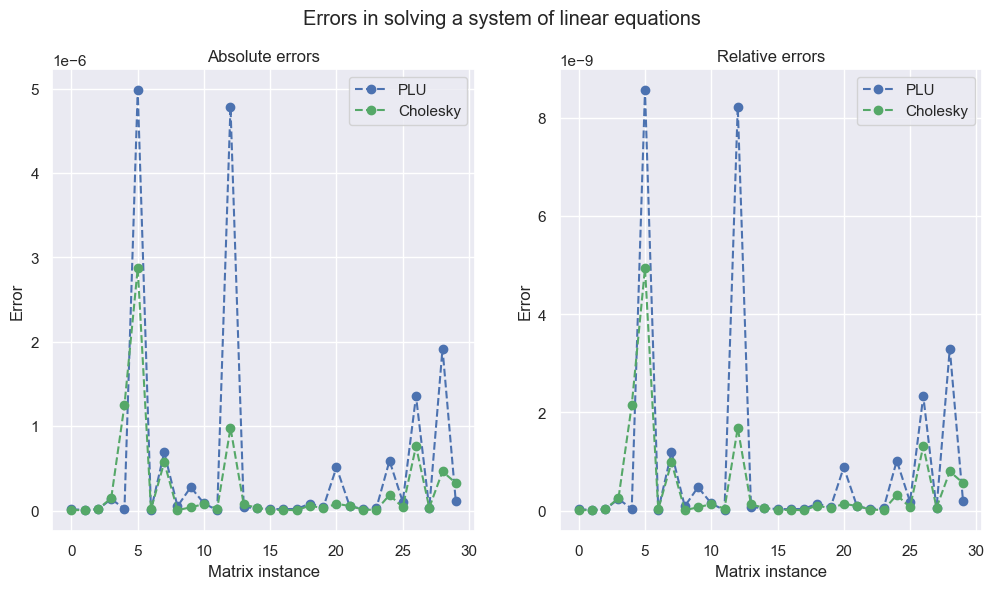

In [19]:
# Plot errors
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Errors in solving a system of linear equations')
axs[0].plot(range(30), abs_errors_plu, 'b--o', label='PLU')
axs[0].plot(range(30), abs_errors_cholesky, 'g--o', label='Cholesky')
axs[0].set_title('Absolute errors')
axs[0].set_xlabel('Matrix instance')
axs[0].set_ylabel('Error')
axs[0].legend()
axs[1].plot(range(30), rel_errors_plu, 'b--o', label='PLU')
axs[1].plot(range(30), rel_errors_cholesky, 'g--o', label='Cholesky')
axs[1].set_title('Relative errors')
axs[1].set_xlabel('Matrix instance')
axs[1].set_ylabel('Error')
axs[1].legend()
plt.show()

- ¿Cuál de los dos errores crees que sea más adecuado utilizar para conocer el mejor funcionamiento de los algoritmos? Justifica tu respuesta.

En este caso particular, dado que no variamos en gran medida las magnitudes de los valores de las matrices, esto no se refleja mucho en la diferencia entre el error absoluto y el error relativo. Es más, puede llegar a observarse que, como siempre se tomo el mismo valor de $\mathbf{x_s}$ para todas las matrices, el error relativo es un tipo de escalamiento del error absoluto. Por lo tanto, ambos nos proporcionan información similar acerca de su funcionamiento.

- De acuerdo a la gráfica obtenida, responde lo siguiente. ¿Cuál algoritmo es más preciso? y ¿cuál algoritmo es más exacto?

In [20]:
print('Media (relative error) PLU:', rel_errors_plu.mean())
print('Media (relative error) Cholesky:', rel_errors_cholesky.mean())

Media (relative error) PLU: 9.19789991248913e-10
Media (relative error) Cholesky: 4.696884248310358e-10


Se observa una ligera diferencia en las medias de errores relativos de ambos métodos. El método de Cholesky parece ser ligeramente menor, lo que podría sugerir que el método de Cholesky tiene una mayor ***exactitud***, sin embargo el margen es muy pequeño y no es bastante decisivo.

In [21]:
print('Standard deviation (relative error) PLU:', rel_errors_plu.std())
print('Standard deviation (relative error) Cholesky:', rel_errors_cholesky.std())

Standard deviation (relative error) PLU: 2.12619455473136e-09
Standard deviation (relative error) Cholesky: 9.853958553672353e-10


Sucede algo similar que en el paso anterior. Las desviaciones estándar del método de Cholesky puden sugerir, con un margen muy pequeño, una mayor ***precisión***.

### 2. **Jacobi y Gauss-Seidel**

Sea $\mathbf{A} \in \mathbb{R}^{n\times n}$ y $\mathbf{b} \in \mathbb{R}^n$. La ecuación
$$\mathbf{Ax=b}$$
tiene solución siempre que $\mathbf{A}$ sea invertible. Si además se cumple que $\rho(A)<1$, la solución $\mathbf{x}$ se puede aproximar mediante algoritmos iterativos.

- Programa en Python una función que aproxime $\mathbf{x}$ dados $\mathbf{A}$ y $\mathbf{b}$ mediante el algoritmo de Jacobi. Recuerda considerar una tolerancia y un número de iteraciones que se puedan modificar para tener una mayor o menor precisión.

In [22]:
def solve_sle_jacobi(A: np.ndarray, b: np.ndarray, x0: np.ndarray, epsilon: float, i_max: int) -> tuple[np.ndarray, int]:
    """
    Solves the system of linear equations Ax = b using Jacobi method

    Example
    --------
    >>> A = np.array([[10, 1, 2], [4, 6, -1], [-2, 3, 8]], dtype=float)
    >>> b = np.array([[3, 9, 51]], dtype=float).T
    >>> x0 = np.array([[3/10, 9/6, 51/8]], dtype=float).T
    >>> solve_sle_jacobi(A, b, x0, 1e-8, 100)
    array([[-1.],
           [ 3.],
           [ 5.]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix
    b (ndarray) : nx1 constant matrix
    x0 (ndarray) : nx1 initial guess
    epsilon (float) : tolerance
    i_max (int) : maximum number of iterations

    Returns
    -------
    x (ndarray) : nx1 solution vector
    k (int) : number of iterations
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix("Matrix A is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix A and vector b have incompatible dimensions")

    x = np.copy(x0)
    for k in range(i_max):
        x = np.concatenate((x, np.zeros((n, 1))), axis=1) # To store the values of x at each iteration
        for i in range(n):
            sum_x = 0
            for j in range(n):
                if i != j:
                    sum_x += A[i, j] * x[j, k]
            x[i, k+1] = 1/A[i, i]*(b[i,0]-sum_x)
        verror = np.linalg.norm(x[:,k+1]-x[:,k])
        if verror < epsilon:
            return x[:, k+1][:, None], k
    return x[:, i_max][:, None], i_max

- Realiza lo mismo que en el inciso anterior usando ahora el algoritmo de Gauss-Seidel.

In [23]:
def solve_sle_gs(A: np.ndarray, b: np.ndarray, x0: np.ndarray, epsilon: float, i_max: int) -> tuple[np.ndarray, int]:
    """
    Solves the system of linear equations Ax = b using Gauss-Seidel method

    Example
    -------
    >>> A = np.array([[10, 1, 2], [4, 6, -1], [-2, 3, 8]], dtype=float)
    >>> b = np.array([[3, 9, 51]], dtype=float).T
    >>> x0 = np.array([[3/10, 9/6, 51/8]], dtype=float).T
    >>> solve_sle_gs(A, b, x0, 1e-8, 100)
    array([[-1.],
           [ 3.],
           [ 5.]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix
    b (ndarray) : nx1 constant matrix
    x0 (ndarray) : nx1 initial guess
    epsilon (float) : tolerance
    i_max (int) : maximum number of iterations

    Returns
    -------
    x (ndarray) : nx1 solution vector
    k (int) : number of iterations
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix("Matrix A is not square")
    n = np.size(b)
    if n != m:
        raise InvalidInputMatrix("Matrix A and vector b have incompatible dimensions")
    x = np.copy(x0)
    for k in range(i_max):
        x = np.concatenate((x, np.zeros((n, 1))), axis=1) # To store the values of x at each iteration
        for i in range(n):
            sum_1, sum_2 = 0, 0
            for j in range(i):
                sum_1 += A[i, j] * x[j,k+1]
            for j in range(i+1, n):
                sum_2 += A[i, j] * x[j,k]
            x[i, k+1] = 1/A[i, i]*(b[i,0]-sum_1-sum_2)
        verror = np.linalg.norm(x[:,k+1]-x[:,k])
        if verror < epsilon:
            return x[:, k+1][:, None], k
    return x[:, k+1][:, None], i_max

- Genera una matriz $\mathbf{A}\in \mathbb{R}^{100 \times 100}$ de forma aleatoria en Python y utilizando la función de numpy para factorización QR, obtén la matriz $\mathbf{Q}$ de la factorización $\mathbf{A=QR}$.

In [24]:
A = np.random.rand(100,100)
Q, _ = np.linalg.qr(A)

- Define una matriz diagonal $\mathbf{D}$, tal que $d_{ii}>d_{(i+1)(i+1)}$ y $d_{11}<1$.

In [25]:
D = np.zeros((100,100))
D[0,0] = 0.9999999 # D[0,0] < 1
for i in range(99):
    D[i+1,i+1] = 0.999*D[i,i] # D[i,i] > D[i+1,i+1]

- Con la matriz $\mathbf{Q}$ y la matriz $\mathbf{D}$, define una nueva matriz $$\mathbf{M=QDQ^T}$$ Como $\rho(M)<1$, se puede aproximar la solución a la ecuación $\mathbf{Mx=b}$ con Jacobi y Gauss-Seidel.

In [26]:
M = Q@D@Q.T

- Genera un vector $\mathbf{x}$ y $\mathbf{b}$ como en el ejercicio 1(e), utilizando $\mathbf{M}$ en lugar de $\mathbf{A}$.

In [27]:
# x_s = np.array([[i+1 for i in range(4)]], dtype=float).T ### No need to redefine x_s
b = M@x_s

In [28]:
# Solution using Jacobi method
x_jacobi, _ = solve_sle_jacobi(M, b, np.zeros((100,1)), 1e-10, 100)
x_jacobi.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [29]:
# Solution using Gauss-Seidel method
x_gs, _ = solve_sle_gs(M, b, np.zeros((100,1)), 1e-10, 100)
x_gs.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

- Calcula el error relativo de Jacobi y Gauss-Seidel para 30 ecuaciones distintas. Almacena tus vectores de error.

In [30]:
# Preallocate arrays for errors
abs_errors_jacobi = np.zeros(30)
abs_errors_gs = np.zeros(30)
rel_errors_jacobi = np.zeros(30)
rel_errors_gs = np.zeros(30)
iter_jacobi = np.zeros(30)
iter_gs = np.zeros(30)
for i in range(30):
    A = scale*np.random.rand(100,100)
    Q, _ = np.linalg.qr(A)
    M = Q@D@Q.T
    b = M@x_s
    x_jacobi, k_j = solve_sle_jacobi(M, b, np.zeros((100,1)), 1e-10, 100)
    x_gs, k_gs = solve_sle_gs(M, b, np.zeros((100,1)), 1e-10, 100)
    abs_errors_jacobi[i] = abs_err(x_jacobi.flatten(), x_s.flatten())
    rel_errors_jacobi[i] = rel_err(x_jacobi.flatten(), x_s.flatten())
    abs_errors_gs[i] = abs_err(x_gs.flatten(), x_s.flatten())
    rel_errors_gs[i] = rel_err(x_gs.flatten(), x_s.flatten())
    iter_jacobi[i] = k_j
    iter_gs[i] = k_gs

- Grafica ambos errores y a partir de la gráfica justifica cuál algoritmo preferirías usar.

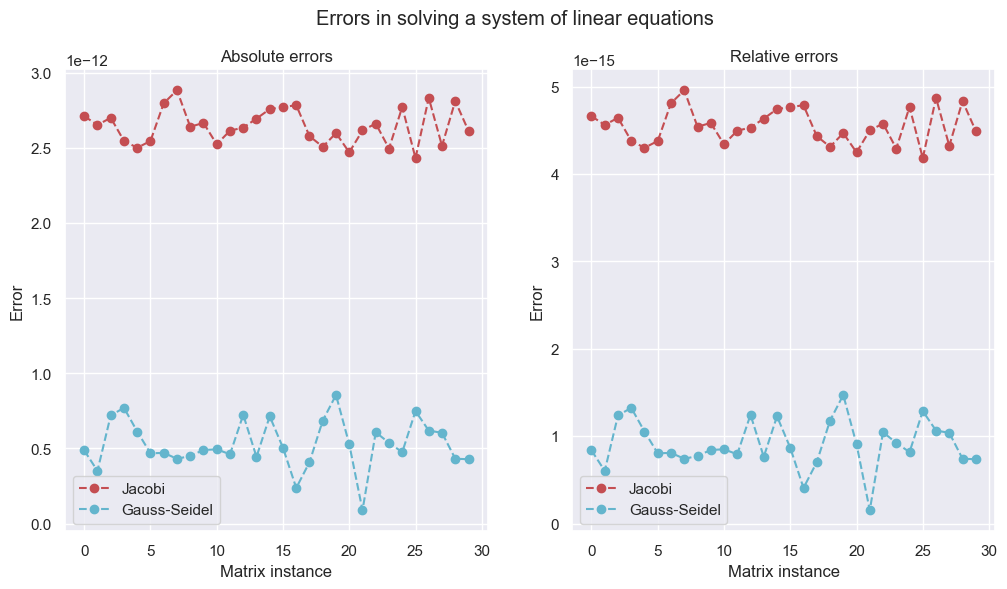

In [31]:
# Plot errors
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Errors in solving a system of linear equations')
axs[0].plot(range(30), abs_errors_jacobi, 'r--o', label='Jacobi')
axs[0].plot(range(30), abs_errors_gs, 'c--o', label='Gauss-Seidel')
axs[0].set_title('Absolute errors')
axs[0].set_xlabel('Matrix instance')
axs[0].set_ylabel('Error')
axs[0].legend()
axs[1].plot(range(30), rel_errors_jacobi, 'r--o', label='Jacobi')
axs[1].plot(range(30), rel_errors_gs, 'c--o', label='Gauss-Seidel')
axs[1].set_title('Relative errors')
axs[1].set_xlabel('Matrix instance')
axs[1].set_ylabel('Error')
axs[1].legend()
plt.show()

Los resultados sugieren que el algoritmo de Gauss-Seidel más exacto dado que:

In [32]:
print('Media (relative error) Jacobi:', rel_errors_jacobi.mean())
print('Media (relative error) Gauss-Seidel:', rel_errors_gs.mean())

Media (relative error) Jacobi: 4.548128713497021e-15
Media (relative error) Gauss-Seidel: 9.082932954510241e-16


Sin emargo, no sucede lo mismo con la precisión, ya que se observó más variación usando Gauss-Seidel:

In [33]:
print('Standard deviation (relative error) Jacobi:', rel_errors_jacobi.std())
print('Standard deviation (relative error) Gauss-Seidel:', rel_errors_gs.std())

Standard deviation (relative error) Jacobi: 2.0278695068688897e-16
Standard deviation (relative error) Gauss-Seidel: 2.7387753493758293e-16


Considero que otro factor decisivo puede ser el número de iteraciones que realizan los métodos:

In [34]:
print('Media (iterations) Jacobi:', iter_jacobi.mean())
print('Media (iterations) Gauss-Seidel:', iter_gs.mean())

Media (iterations) Jacobi: 10.0
Media (iterations) Gauss-Seidel: 7.033333333333333


De esta manera, teniendo una mayor precisión y un menor número de iteraciones, preferiría usar Gauss-Seidel; sacrificando un poco de la precisión de los resultados.

### 3. **Factorización QR**

- Programa una función en Python que obtenga la factorización QR mediante el algoritmo de Gram-Schmidt.

In [35]:
def qr_fact(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    QR factorization of a matrix A

    Example
    --------
    >>> A = np.array([[1,0,3],[2,1,1],[1,4,5]], dtype=float)
    >>> qr_fact(A)
    (array([[ 0.40824829, -0.30151134,  0.86164044],
        [ 0.81649658, -0.30151134, -0.49236596],
        [ 0.40824829,  0.90453403,  0.12309149]]),
    array([[2.44948974e+00, 2.44948974e+00, 4.08248290e+00],
        [0.00000000e+00, 3.31662479e+00, 3.31662479e+00],
        [4.57966998e-16, 9.43689571e-16, 2.70801280e+00]]))

    Parameters
    ----------
    A (ndarray) : nxn matrix

    Returns
    -------
    Q (ndarray) : nxn orthogonal matrix
    R (ndarray) : nxn upper triangular matrix
    """
    m, n = A.shape
    if m != n:
        raise InvalidInputMatrix("Matrix A is not square")
    Q = np.zeros((n,n))
    Q[:,0] = A[:,0]/np.linalg.norm(A[:,0])
    for k in range(1,n):
        Q[:,k] = A[:,k]-sum((Q[:,i]@A[:,k]/(Q[:,i]@Q[:,i]))*Q[:,i] for i in range(k))
        Q[:,k] = Q[:,k]/np.linalg.norm(Q[:,k])
    R = Q.T@A
    return Q, R

- Dada la ecuación $\mathbf{Ax=b}$ con $\mathbf{A}$ una matriz invertible y la factorización $\mathbf{A=QR}$, entonces, la solución $\mathbf{x}$ se puede obtener al resolver la ecuación $\mathbf{Rx=Q^Tb}$ donde $\mathbf{R}$ es una matriz triangular superior. Define una función en Python que obtenga la solución a dicha ecuación, dados $\mathbf{A}$, $\mathbf{b}$ y que utilice la factorización QR de $\mathbf{A}$.

In [36]:
def solve_qr(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Solves the system of linear equations Ax = b using QR factorization

    Example
    --------
    >>> A = np.array([[1,0,3],[2,1,1],[1,4,5]], dtype=float)
    >>> b = np.array([[1,2,3]], dtype=float).T
    >>> solve_qr(A, b)
    array([[0.72727273],
           [0.45454545],
           [0.09090909]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix
    b (ndarray) : nx1 constant matrix

    Returns
    -------
    x (ndarray) : nx1 solution vector
    """
    Q, R = qr_fact(A)
    y = Q.T@b
    x = solve_ux_b(R, y)
    return x

- Define $\mathbf{A}$, $\mathbf{x}$ y $\mathbf{b}$ de forma análoga a los ejercicios anteriores y encuentra la solución a la ecuación $\mathbf{Ax=b}$, utilizando tu solucionador con factorización QR.

In [37]:
A = scale*np.random.rand(100,100)
# x_s = np.array([[i+1 for i in range(100)]], dtype=float).T ### No need to redefine x_s
b = A@x_s

In [38]:
# Exact solution
x_s.flatten()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [39]:
# qr solution
x_qr = solve_qr(A, b)
x_qr.flatten()

array([  1.        ,   2.        ,   3.        ,   4.        ,
         5.        ,   6.        ,   7.        ,   8.        ,
         9.        ,  10.        ,  11.        ,  12.        ,
        13.        ,  14.        ,  15.00000001,  16.        ,
        17.        ,  18.        ,  19.        ,  20.        ,
        21.        ,  22.00000001,  22.99999999,  24.        ,
        25.        ,  25.99999999,  27.        ,  28.        ,
        29.        ,  29.99999999,  31.        ,  32.        ,
        33.        ,  34.        ,  35.        ,  36.        ,
        37.        ,  38.        ,  38.99999999,  40.        ,
        41.        ,  42.        ,  43.        ,  44.        ,
        45.        ,  46.        ,  47.        ,  48.00000001,
        49.        ,  49.99999999,  51.        ,  52.        ,
        53.        ,  54.        ,  55.        ,  56.        ,
        57.        ,  58.        ,  59.        ,  60.00000001,
        61.        ,  62.        ,  63.        ,  64.  

- Calcula el error relativo de 30 ecuaciones como la del inciso anterior y almacena tu vector de errores.

In [40]:
# Preallocate arrays for errors
abs_errors_qr = np.zeros(30)
rel_errors_qr = np.zeros(30)

In [41]:
for i in range(30):
    A = scale*np.random.rand(100,100)
    b = A@x_s
    x_qr = solve_qr(A, b).flatten()
    abs_errors_qr[i] = abs_err(x_qr, x_s.flatten())
    rel_errors_qr[i] = rel_err(x_qr, x_s.flatten())

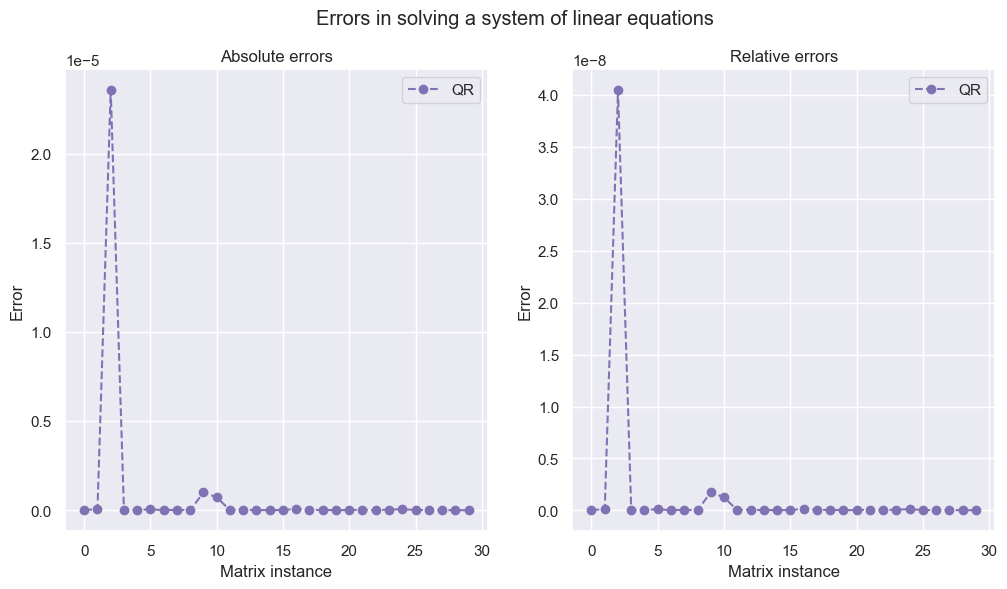

In [42]:
# Plot errors
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Errors in solving a system of linear equations')
axs[0].plot(range(30), abs_errors_qr, 'm--o', label='QR')
axs[0].set_title('Absolute errors')
axs[0].set_xlabel('Matrix instance')
axs[0].set_ylabel('Error')
axs[0].legend()
axs[1].plot(range(30), rel_errors_qr, 'm--o', label='QR')
axs[1].set_title('Relative errors')
axs[1].set_xlabel('Matrix instance')
axs[1].set_ylabel('Error')
axs[1].legend()
plt.show()

### 4. **Comparación de solucionadores**

Grafica los errores relativos de tus 5 solucionadores en una misma gráfica, la media de errores y la desviación estándar para cada método.

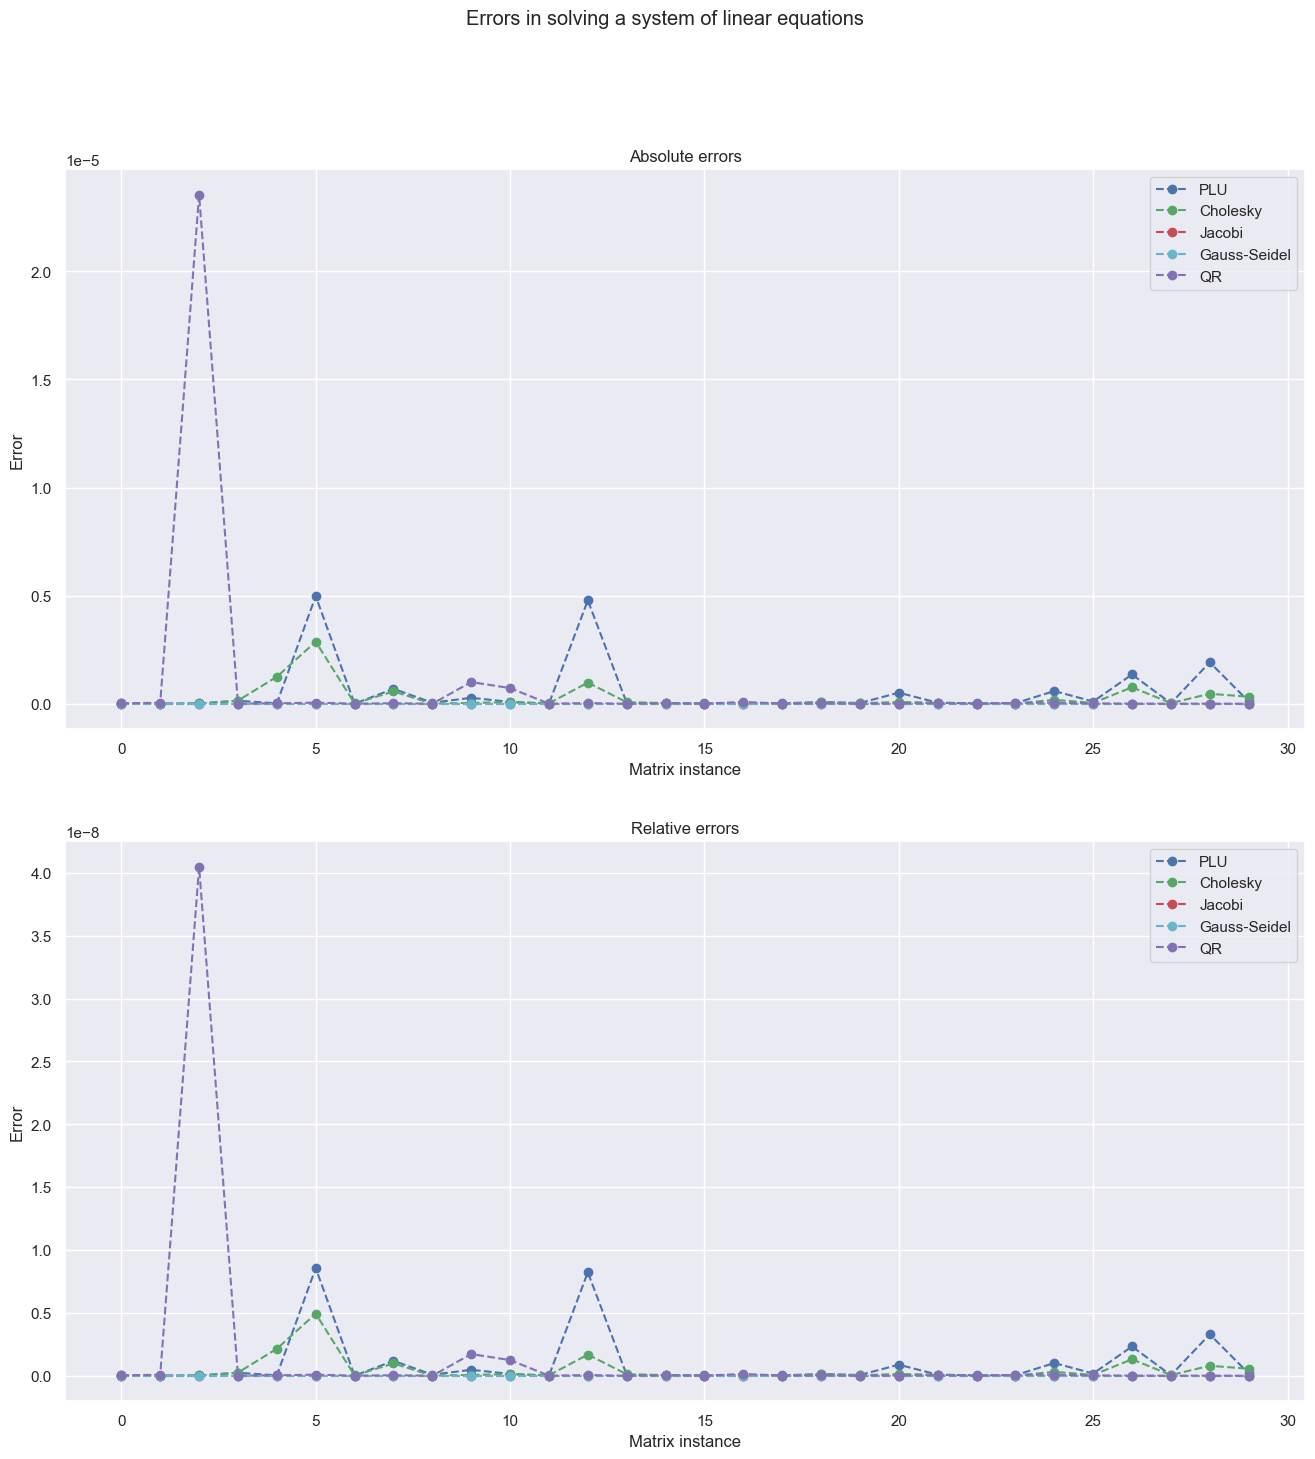

In [43]:
# Plot errors
fig, axs = plt.subplots(2, 1, figsize=(16, 16))
fig.suptitle('Errors in solving a system of linear equations')
axs[0].plot(range(30), abs_errors_plu, 'b--o', label='PLU')
axs[0].plot(range(30), abs_errors_cholesky, 'g--o', label='Cholesky')
axs[0].plot(range(30), abs_errors_jacobi, 'r--o', label='Jacobi')
axs[0].plot(range(30), abs_errors_gs, 'c--o', label='Gauss-Seidel')
axs[0].plot(range(30), abs_errors_qr, 'm--o', label='QR')
axs[0].set_title('Absolute errors')
axs[0].set_xlabel('Matrix instance')
axs[0].set_ylabel('Error')
axs[0].legend()
axs[1].plot(range(30), rel_errors_plu, 'b--o', label='PLU')
axs[1].plot(range(30), rel_errors_cholesky, 'g--o', label='Cholesky')
axs[1].plot(range(30), rel_errors_jacobi, 'r--o', label='Jacobi')
axs[1].plot(range(30), rel_errors_gs, 'c--o', label='Gauss-Seidel')
axs[1].plot(range(30), rel_errors_qr, 'm--o', label='QR')
axs[1].set_title('Relative errors')
axs[1].set_xlabel('Matrix instance')
axs[1].set_ylabel('Error')
axs[1].legend()
plt.show()

Con base en esto, responde las siguientes preguntas

1. ¿Cuál es el solucionador más preciso?


Con base en las desviaciones estándar de los errores:

In [44]:
print('Standard deviation (relative error) PLU:', rel_errors_plu.std())
print('Standard deviation (relative error) Cholesky:', rel_errors_cholesky.std())
print('Standard deviation (relative error) Jacobi:', rel_errors_jacobi.std())
print('Standard deviation (relative error) Gauss-Seidel:', rel_errors_gs.std())
print('Standard deviation (relative error) QR:', rel_errors_qr.std())

Standard deviation (relative error) PLU: 2.12619455473136e-09
Standard deviation (relative error) Cholesky: 9.853958553672353e-10
Standard deviation (relative error) Jacobi: 2.0278695068688897e-16
Standard deviation (relative error) Gauss-Seidel: 2.7387753493758293e-16
Standard deviation (relative error) QR: 7.25159549439433e-09


Los resultados sugieren que el solucionador con método de Jacobi es más preciso. Como vimos anteriormente, pese a que comparten la misma condición de paro, Jacobi suele presentar menos variación en los errores de solución.

2. ¿Cuál es el solucionador más exacto?

Con base en la media de los errores:

In [45]:
print('Media (relative error) PLU:', rel_errors_plu.mean())
print('Media (relative error) Cholesky:', rel_errors_cholesky.mean())
print('Media (relative error) Jacobi:', rel_errors_jacobi.mean())
print('Media (relative error) Gauss-Seidel:', rel_errors_gs.mean())
print('Media (relative error) QR:', rel_errors_qr.mean())

Media (relative error) PLU: 9.19789991248913e-10
Media (relative error) Cholesky: 4.696884248310358e-10
Media (relative error) Jacobi: 4.548128713497021e-15
Media (relative error) Gauss-Seidel: 9.082932954510241e-16
Media (relative error) QR: 1.4803156513500282e-09


Los datos sugieren que el solucionador con Gauss-Seidel es más preciso. Sin embargo, esto puede deberse a que se especifico una tolerancia de condición de paro de 1e-10, i.e. podemos ajustar que tanto queremos que converja la solución. Podrían obtenerse resultados diferentes con tolerancias menores.

3. Si la matriz $\mathbf{A}$ es una matriz cuadrada e invertible, ¿cuál método utilizarías para resolver la ecuación $\mathbf{Ax=b}$?

Dependerá de la información que tenga de antemano del sistema:
- Si es claro que es dominante diagonal: Gauss-Seidel
- Si no está claro que condiciones tiene el sistema: QR, esto porque en las situaciones reales, puede ser poco probable tener un sistema de ecuaciones con una matriz simétrica positiva definida asociada, y porque, de acuerdo a lo visto en estas ejecuciones, QR es más exacto.

4. Si hay un método que soluciona la ecuación para una matriz invertible, ¿cuáles son las ventajas de los otros algoritmos frente al solucionador que escogiste en el inciso anterior?